In [1]:
import numpy as np 
import pandas as pd 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df1 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.12/2022.06.12.csv')
df2 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.13/2022.06.13.csv')
df3 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.14/2022.06.14.csv')

In [3]:
df_dataset = pd.concat([df1, df2, df3])
df_dataset.reset_index(drop=True, inplace=True)
len(df_dataset.columns)

16

In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068376 entries, 0 to 1068375
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1068376 non-null  float64
 1   bytes_in       1068376 non-null  int64  
 2   bytes_out      1068376 non-null  int64  
 3   dest_ip        1068376 non-null  int64  
 4   dest_port      964168 non-null   float64
 5   entropy        1068376 non-null  float64
 6   num_pkts_out   1068376 non-null  int64  
 7   num_pkts_in    1068376 non-null  int64  
 8   proto          1068376 non-null  int64  
 9   src_ip         1068376 non-null  int64  
 10  src_port       964168 non-null   float64
 11  time_end       1068376 non-null  int64  
 12  time_start     1068376 non-null  int64  
 13  total_entropy  1068376 non-null  float64
 14  label          1068376 non-null  object 
 15  duration       1068376 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 130.4

In [5]:
df_dataset = df_dataset.drop(['num_pkts_out', 'num_pkts_in'], axis=1)

In [6]:
df_dataset.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'proto', 'src_ip', 'src_port', 'time_end', 'time_start',
       'total_entropy', 'label', 'duration'],
      dtype='object')

In [7]:
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
df_dataset.dropna(inplace=True)

In [9]:
print(df_dataset.duplicated().sum())

4447


In [10]:
df_dataset.drop_duplicates(inplace = True)

In [11]:
print(df_dataset.duplicated().sum())

0


In [12]:
df_dataset.drop_duplicates(inplace = True)

In [13]:
print(df_dataset.duplicated().sum())

0


In [14]:
df_dataset["label"].value_counts()

label
benign       516220
outlier      365385
malicious     78116
Name: count, dtype: int64

In [15]:
old_value = 'outlier'
new_value = 0
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [16]:
old_value = 'malicious'
new_value = 1
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [17]:
old_value = 'benign'
new_value = 2
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

/tmp/ipykernel_79/3502624556.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)


In [18]:
df_dataset["label"].value_counts()

label
2    516220
0    365385
1     78116
Name: count, dtype: int64

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_dataset.drop(['label', 'dest_ip', 'src_ip', 'dest_port', 'src_port', 'time_start', 'time_end'], axis=1).values
y = df_dataset['label'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self).__init__()
        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 32)
        self.linear4 = nn.Linear(32, output_size)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        return x

input_size = X_train.shape[1] 
output_size = 3 
learning_rate = 0.001
epochs = 100

model = SimpleLinearModel(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# for epoch in range(epochs):
#     outputs = model(X_train)
#     loss = criterion(outputs, y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if (epoch+1) % 2 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# with torch.no_grad():
#     outputs = model(X_test)
#     _, predicted = torch.max(outputs, 1)
#     accuracy = (predicted == y_test).sum().item() / len(y_test)
#     print(f'Accuracy on test set: {accuracy * 100:.2f}%')


/tmp/ipykernel_79/611475692.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/tmp/ipykernel_79/611475692.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Using device: cuda
Epoch [10/100], Loss: 0.8528
Epoch [20/100], Loss: 0.6819
Epoch [30/100], Loss: 0.6097
Epoch [40/100], Loss: 0.5827
Epoch [50/100], Loss: 0.5703
Epoch [60/100], Loss: 0.5647
Epoch [70/100], Loss: 0.5620
Epoch [80/100], Loss: 0.5606
Epoch [90/100], Loss: 0.5595
Epoch [100/100], Loss: 0.5586


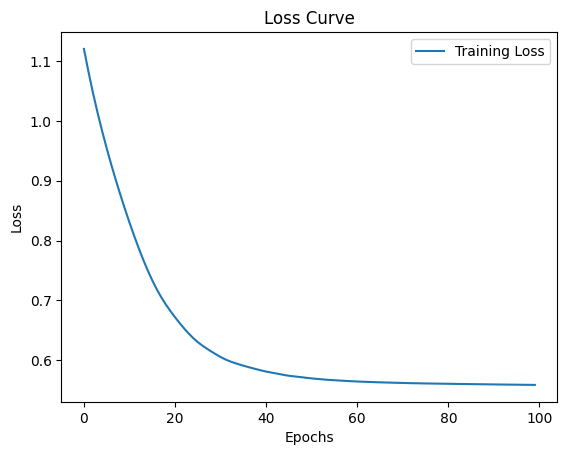

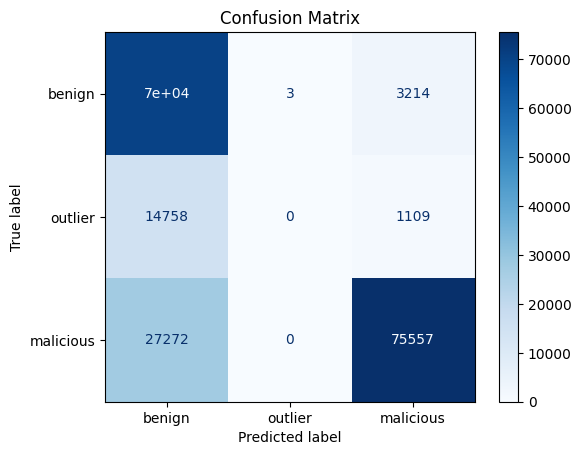

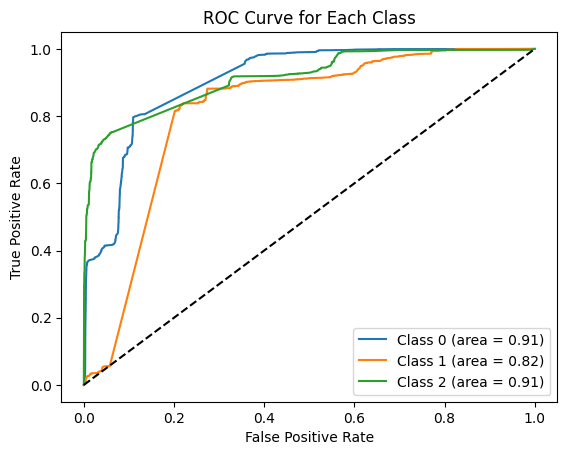

In [20]:
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Move model to GPU
model = model.to(device)

# Move data to GPU
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

loss_values = []

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.figure()
plt.plot(range(epochs), loss_values, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    probabilities = softmax(outputs, dim=1).cpu().numpy()  # Move to CPU for numpy compatibility
    y_test_np = y_test.cpu().numpy()
    predictions = np.argmax(probabilities, axis=1)

conf_matrix = confusion_matrix(y_test_np, predictions)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'outlier', 'malicious'])
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

plt.figure()
for i in range(output_size):
    binary_true = (y_test_np == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_true, probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


In [21]:
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')


Accuracy on test set: 75.85%
